Aplicación de métodos Desviación Estándar y Rango Intercuarlítico 

In [2]:
#Importamos librerías de pandas, nunoy y matplotlib respectivamente.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('Detalle_precios_y_productos_fabricados_2022_SN.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1426 non-null   int64  
 1   CVE_DOC                    1426 non-null   object 
 2   FECHA_DOC                  1426 non-null   object 
 3   NOMBRE_VENDEDOR            1426 non-null   object 
 4   NOMBRE_CLIENTE             1426 non-null   object 
 5   CANT                       1426 non-null   int64  
 6   CVE_ART                    1426 non-null   object 
 7   DESCR                      1426 non-null   object 
 8   PRECIO_UNITARIO            1426 non-null   float64
 9   COSTO_UNITARIO             1426 non-null   float64
 10  COSTO_UNITARIO_CALCULADO   1426 non-null   float64
 11  SUBTOTAL_PARTIDA           1426 non-null   float64
 12  COSTO_TOTAL_CALCULADO      1426 non-null   float64
 13  MARGEN_UNITARIO_CALCULADO  1426 non-null   float

In [7]:
#Dividir el df en 2 partes una parte en cualitatvivas y una parte en cuantitativas
cuantitativas= df.iloc[:, [5, 8, 9, 10, 11, 12, 13, 14]]
cualitativas= df.iloc[:, [0, 1, 2, 3, 4, 6, 7]]

<Figure size 1500x800 with 0 Axes>

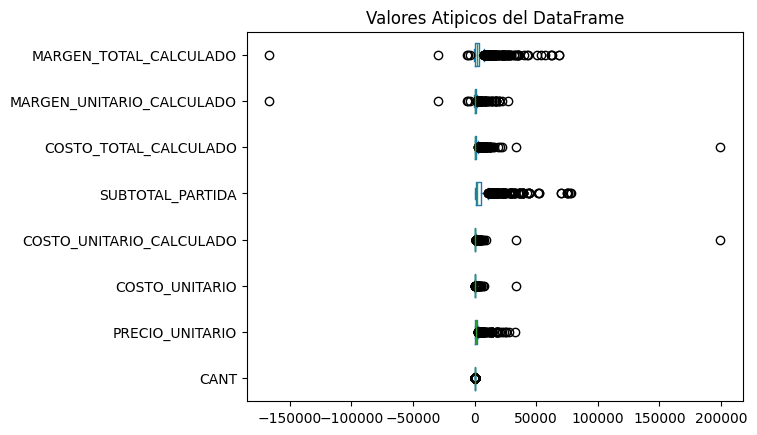

In [8]:
#Utilizamos funciones para realizar diagramas de caja de bigotes
#Solo graficamos las vatibales que son cuantitativas, ya que son las que tenemos como tipo flotante y son las unicas que se pueden graficar
#Por otro lado, las cualitativas las separamos del diagrama de caja de bigotes
fig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atipicos del DataFrame')
plt.show()  #Dibujamos el diagrama

In [9]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CANT                       1426 non-null   int64  
 1   PRECIO_UNITARIO            1426 non-null   float64
 2   COSTO_UNITARIO             1426 non-null   float64
 3   COSTO_UNITARIO_CALCULADO   1426 non-null   float64
 4   SUBTOTAL_PARTIDA           1426 non-null   float64
 5   COSTO_TOTAL_CALCULADO      1426 non-null   float64
 6   MARGEN_UNITARIO_CALCULADO  1426 non-null   float64
 7   MARGEN_TOTAL_CALCULADO     1426 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 89.3 KB


*PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME*

In [10]:
#Utilizamos regla empírica (3)
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
MARGEN_TOTAL_CALCULADO       28691.369713
dtype: float64
Limite inferior permitido CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
MARGEN_TOTAL_CALCULADO      -21519.643893
dtype: float64


In [11]:
#Obtenemos datos y los outliers se convierten en nulos en el datafame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [12]:
#Corroboramos valores nulos en el df, pero en cuestion de valores atipicos (outliers)
valores_nulos=data3.isnull().sum()
valores_nulos

CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
MARGEN_TOTAL_CALCULADO       24
dtype: int64

In [13]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos una copia del df
data_clean=data3.copy()
data_clean= data_clean.fillna(round(data3.mean(),1))
data_clean

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49,4025.49


In [14]:
#Corroboramos los valores nulos del df LIMPIO
valores_nulos= data_clean.isnull().sum()
valores_nulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

*PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIER EN EL DATAFRAME*

In [15]:
#Método aplicando Cuartiles. Encuentro con 0.25 y 0.75
y=cuantitativas
percentile25= y.quantile(0.25)
percentile75= y.quantile(0.75)
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido CANT                             8.50000
PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
MARGEN_TOTAL_CALCULADO        7807.59750
dtype: float64
Limite inferior permitido CANT                           -3.50000
PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
MARGEN_TOTAL_CALCULADO      -3594.42250
dtype: float64


In [16]:
#Filtramos para eliminar valores atípicos según el método IQR
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,NaN,NaN,NaN,5909.84,1884.35,NaN,4025.49


In [17]:
#Corroboramos valores del df
valores_nulos= data3_iqr.isnull().sum()
valores_nulos

CANT                         169
PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
MARGEN_TOTAL_CALCULADO       168
dtype: int64

In [18]:
#Reemplazamos valores faltantes con la media y creamos una copia
data4_iqr= data3_iqr.copy()
data4_iqr= data4_iqr.fillna(round(data3_iqr.mean(), 1))
data4_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1.0,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [19]:
#Unimos las columnas cualitativas con las numéricas limpias
Datos_Limpios= pd.concat([cualitativas, data4_iqr], axis=1)
Datos_Limpios

,Unnamed: 0,CVE_DOC,FECHA_DOC,NOMBRE_VENDEDOR,NOMBRE_CLIENTE,CVE_ART,DESCR,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO,MARGEN_TOTAL_CALCULADO
0,0,F37034,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,TUE00244,"TUB COBRE 5/16""ØX165MM CIRCULA1.5KW127V",1.0,434.48,52.80,52.80,434.48,52.80,381.68,381.68
1,1,F37036,2022-01-05,LETICIA RAMIREZ HERNANDEZ,JUAN ANTONIO RESENDIZ UGALDE,TUA00028,"TUA U"" 5/16 ØX250MM 1200W 120V TAP1""NPT",1.0,1264.05,327.18,327.18,1264.05,327.18,936.87,936.87
2,2,F37041,2022-01-05,DIEGO ARMANDO LEON DURAN,ANA BARBARA CRUZ PALACIOS,TP0007,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 7 MT,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94,2617.56
3,3,F37042,2022-01-05,DIEGO ARMANDO LEON DURAN,OMAR RODRIGUEZ GOMEZ,TP0001,TERMOPAR J 3/16 Ø X 1' 1/2 EXT. 1 MT,1.0,140.00,38.96,38.96,140.00,38.96,101.04,101.04
4,4,F37043,2022-01-05,LETICIA RAMIREZ HERNANDEZ,PÚBLICO EN GENERAL,BP00242,BAN P INOX 115MMX235MM 1000W 127V T/TOR,2.0,172.41,101.71,101.71,344.83,203.42,70.71,141.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,1421,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12F1040A00,"CAS INOX 1/2""ØX3"" 400W 127V EXT.30CM",6.0,712.00,102.31,102.31,4272.00,613.88,609.69,3658.12
1422,1422,F39834,2022-12-23,LETICIA RAMIREZ HERNANDEZ,LUIS ENRIQUE PATIÑO PEREZ,CS12H1050A00,"CAS INOX 1/2""ØX4"" 500W 127V EXT30CM",6.0,718.60,104.69,104.69,4311.60,628.12,613.91,3683.48
1423,1423,F39835,2022-12-23,LETICIA RAMIREZ HERNANDEZ,SEVEN DAYS ALL SPORT,TUE00394,"TUB INOX 5/16""ØX300MM 5300W 220V ""M"" ESP",3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80,4757.41
1424,1424,F39837,2022-12-23,LETICIA RAMIREZ HERNANDEZ,REVUELTA MONTECARLO,TUA00470,"TUB INOX 1/2""ØX500MM 10KW 220V 2 1/2""NPT",1.0,942.70,108.00,219.90,5909.84,1884.35,684.80,4025.49


In [20]:
valores_nulos= Datos_Limpios.isnull().sum()
valores_nulos

Unnamed: 0                   0
CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              0
NOMBRE_CLIENTE               0
CVE_ART                      0
DESCR                        0
CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [21]:
#Creamos un df con datos limpios
Datos_Limpios.to_csv("Datos_Limpios_4.1.csv")